# **Project Title : Predicting whether a customer will default on his/her credit card**

## **Project Name:-**

Project Type -Classification

Contribution - Individual

## **Project Summary**

Credit card Classification Project
Credit card is now the day most popular; every bank releases their credit card for customers to spend with a limit and then pay in installments. In this project, I have been doing an analysis of a Credit card default payment dataset and I have built machine learning models to predict the target variable. I have been using machine learning algorithms like Logistic, Decision Tree, Random Forest, KNN, and XG Boost.

Steps:
First, I have to know about the dataset like

•	Import different important libraries

•	Load dataset

•	There are 30000 rows and 25 columns

•	There is no duplicate or missing data in the dataset.

Then understand variables or features

•	Check the column’s name and type

•	Check the statistical description of the continuous features.

I did some exploratory data analysis of the dataset to find some patterns or 
trends.

•	I found that 22% of customers have default payments next month.

•	Pay amount is the most influential factor for default payment next month.

•	Young people of age less than 35 uses credit card most.

Then I did some feature engineering.

•	The Target variable was imbalanced, so I used SMOTE to balance the target variable.

•	Converted categorical features into continuous features.

Now my dataset is ready for model implementation.

•	I have implemented 5 different machine learning models to predict the target variable.

•	I first trained my model and then tested it on the test dataset.

•	For the performance, I have used accuracy, precision, recall, and the f1-score of each model. 


Result:

All the performance values of each model are given on the test dataset.

•	The Logistic classifier has an accuracy of 61.2%

•	The Decision Tree has an accuracy of 74.52%

•	The Random Forest has an accuracy of 78.68%.

•	KNN classifier model has an accuracy of 80%

•	XG Boost has an accuracy of 82.71% which is the highest of all models.

I can clearly say that XG Boost is the best and all performance metrics are highest among all models.


## **GitHub Link**

https://github.com/Sohailtanveer1/credit-card-default-prediction.git

## **Problem Statement**



This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments

## **Main Librarires used**



*   pandas for data manipulation and aggregation

*   Matplotlib, seaborn for visualization and behavior with respect to target variable
*   Numpy for computational efficient operation


*   Sikit learn for model training, model optimization and metrics calculations




## **Project architecture**

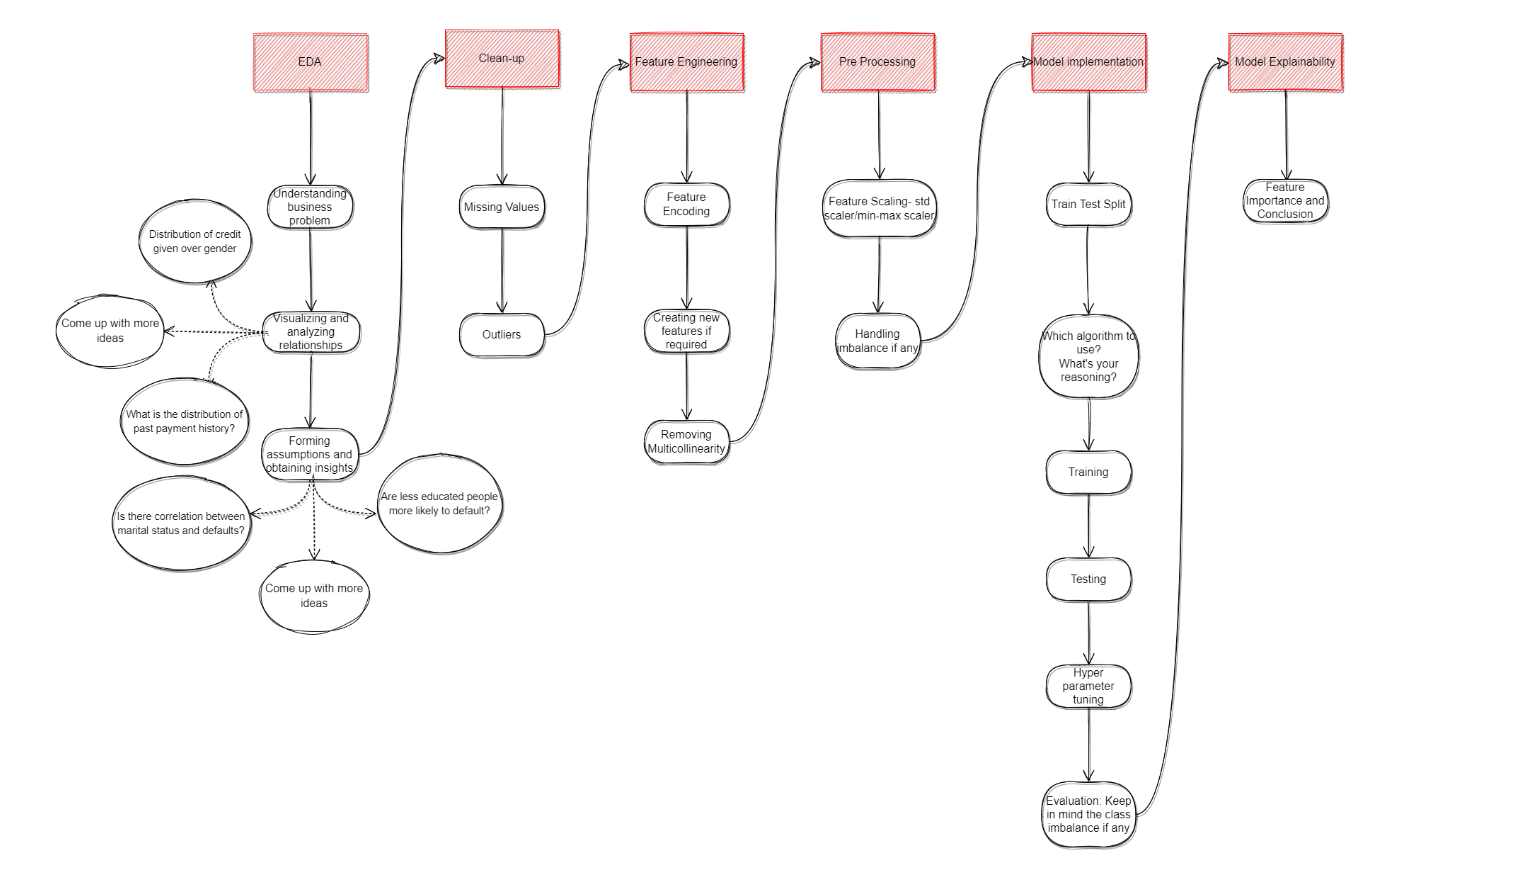

# **1. Know Your Data** 

### Import Libraries

In [ ]:
# Mounting Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries

import numpy as np
import pandas as pd
from numpy import math
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [ ]:
# loading Dataset

path='/content/drive/MyDrive/Colab Notebooks/Capstone Projects/credit card Classification/default of credit card clients.xls - Data.csv'
data=pd.read_csv(path,header = 1)

### Dataset Preview

In [ ]:
# Check first five observations of the dataset


data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows and Column Count

In [ ]:
# Check number of rows and columns

data.shape

(30000, 25)

### Dataset Information

In [ ]:
# Check dataset information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
#check for duplicates

print(len(data[data.duplicated()]))

0


In [ ]:
# check for missing or  NULL values

data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

# **2. Understand Your Variable**

In [ ]:
# dataset Columns
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# statistical description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


### Variable Description

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.


X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# **3. EDA Explorartory Data Analysis**

## **Target Variable EDA**

In [ ]:
#renaming for better convinience
data.rename(columns={'default payment next month' : 'default_payment_next_month'}, inplace=True)
data.rename(columns={'PAY_0' : 'PAY_1'}, inplace=True)

In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# target variable value counts

data['default_payment_next_month'].value_counts().sort_index().reset_index()

,index,default_payment_next_month
0,0,23364
1,1,6636


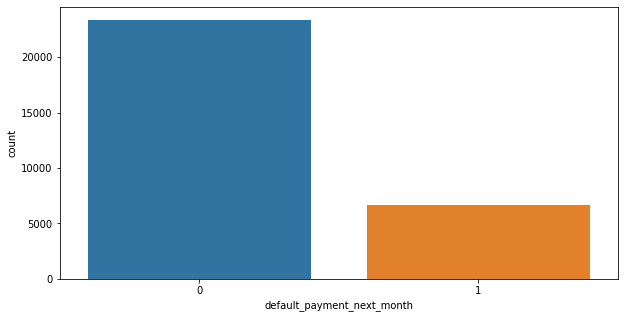

In [ ]:
#check target variable value proportion

plt.figure(figsize=(10,5))
sns.countplot(x = 'default_payment_next_month', data = data)

In [ ]:
data['default_payment_next_month'].value_counts(normalize=True).reset_index()

,index,default_payment_next_month
0,0,0.7788
1,1,0.2212


**22% of customers has default payment next month**

## **Continous Features EDA**

### **History of Previous payment**

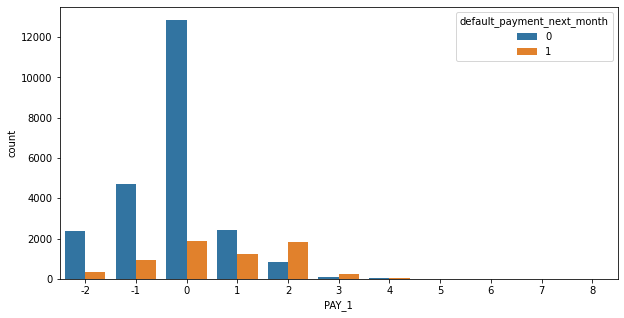

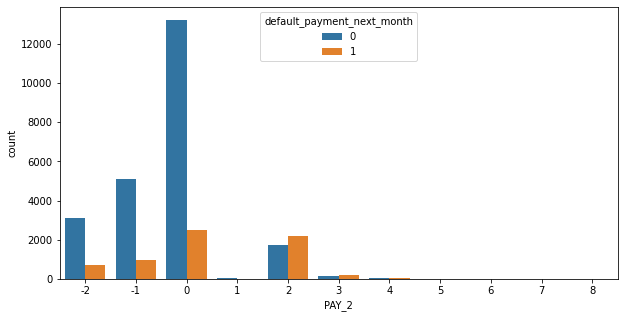

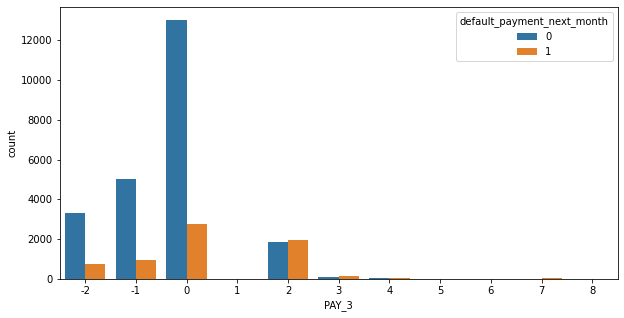

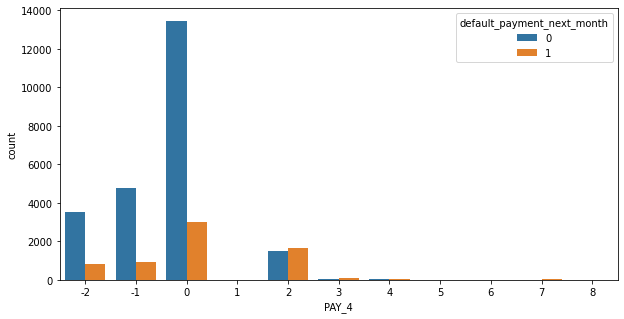

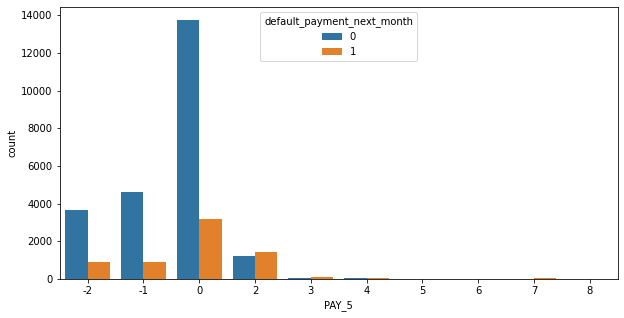

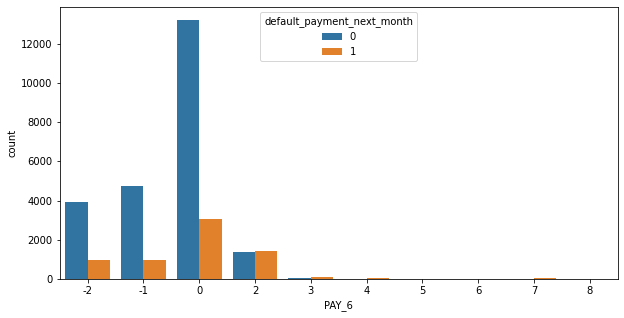

In [ ]:
#plotting the count plot for Previous payment status
pre_payment = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in pre_payment:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'default_payment_next_month', data = data)

### **Bill Amount**

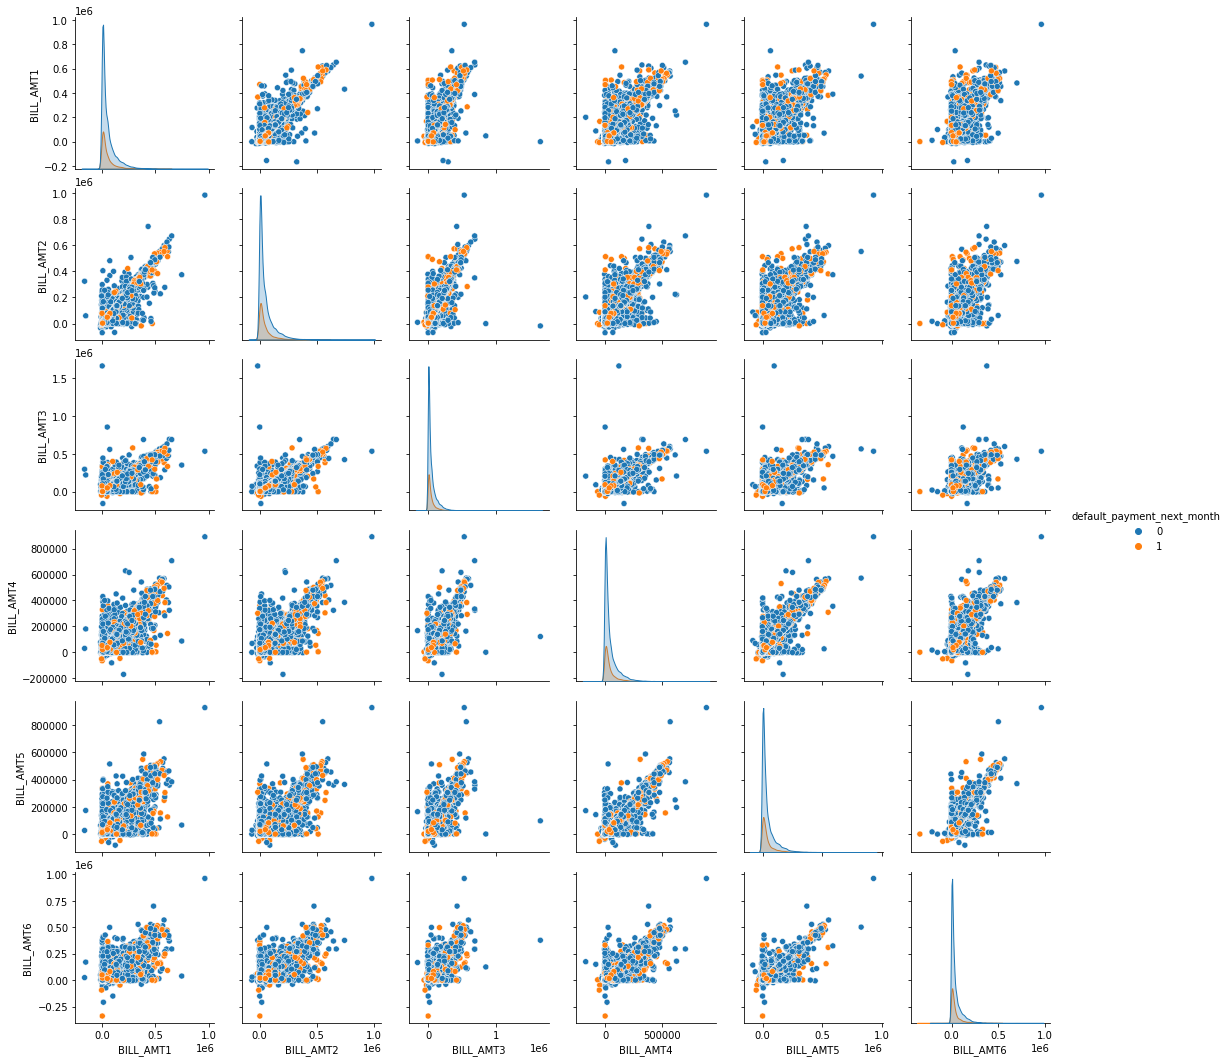

In [ ]:
#plotting the count plot for Bill Amount

bill_amount_df=data[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','default_payment_next_month']]
#plotting the pair plot for paid amount
sns.pairplot(data =bill_amount_df, hue='default_payment_next_month')

### **Amount of previous payment**

In [ ]:
paid_amount=['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','default_payment_next_month']

[Text(0.5, 1.0, 'Amoount of preveious bill paid over AGE ')]

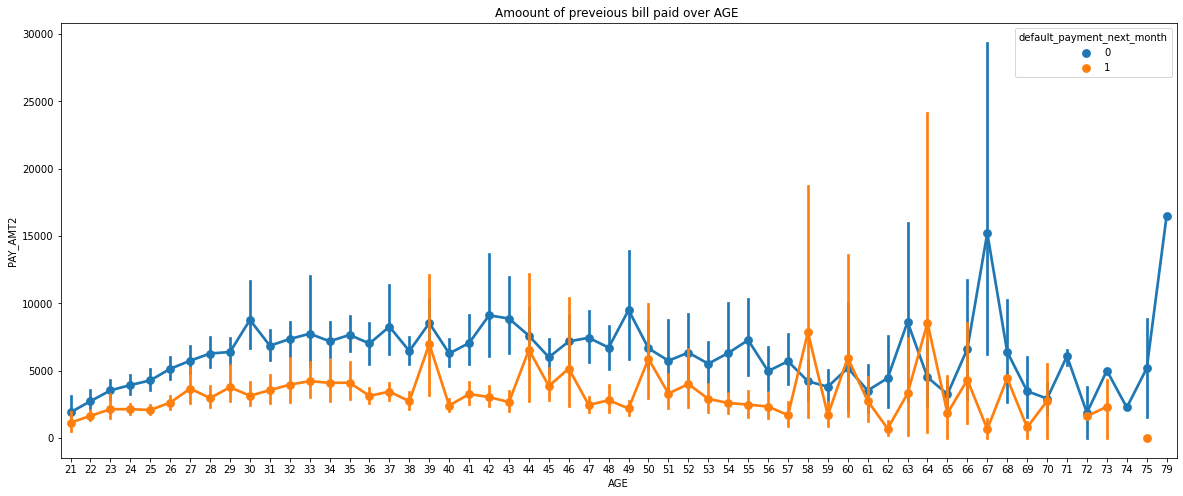

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=data,x='AGE',y='PAY_AMT2',hue='default_payment_next_month',ax=ax)
ax.set(title='Amoount of preveious bill paid over AGE ')

In [ ]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

In [ ]:
continous_features = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' ]

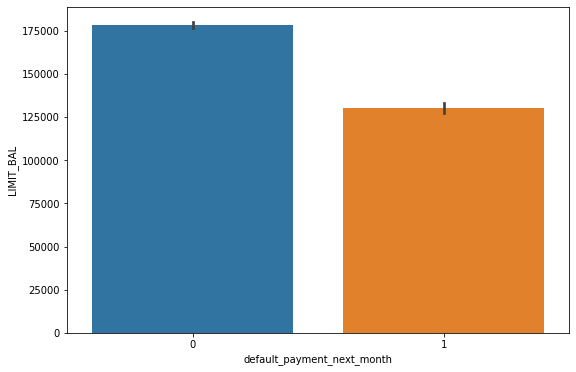

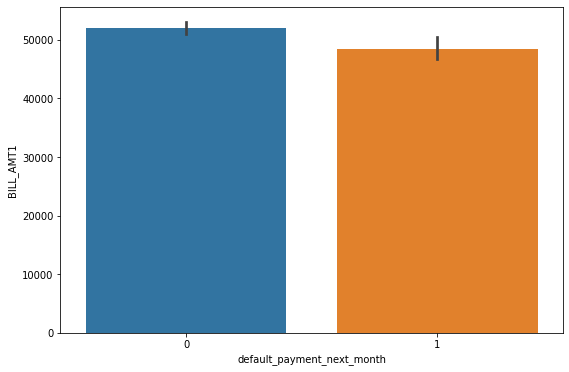

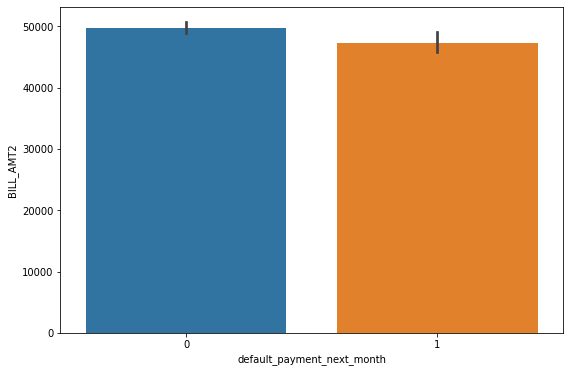

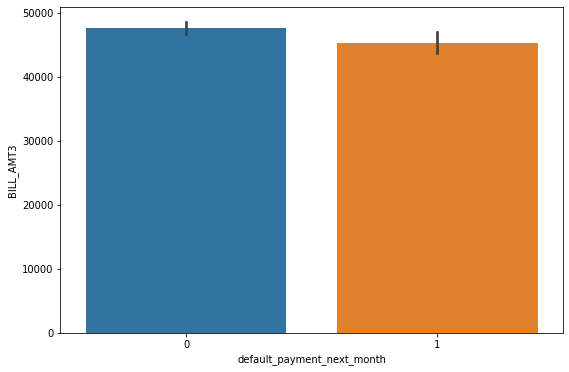

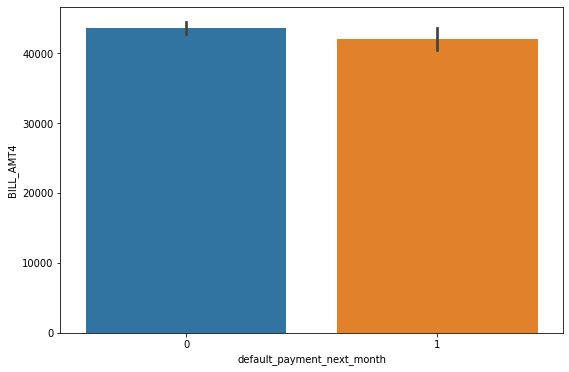

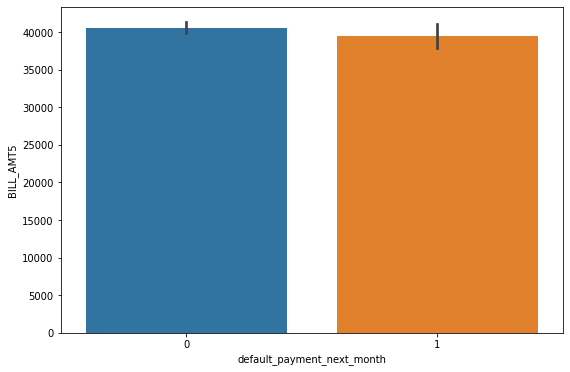

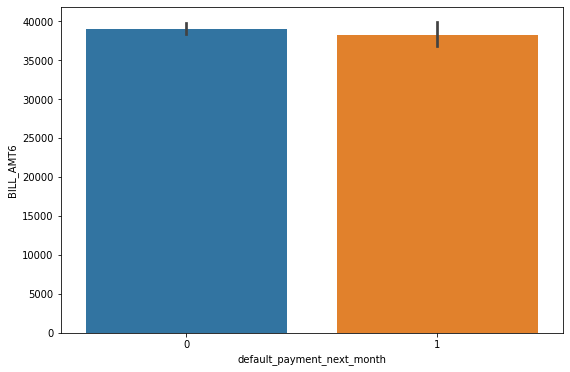

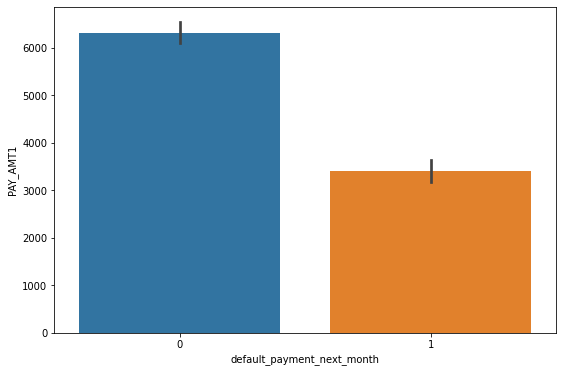

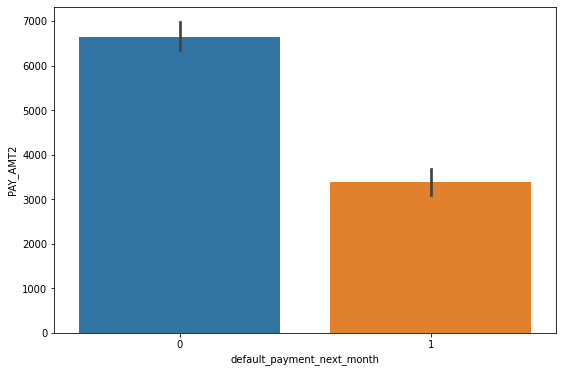

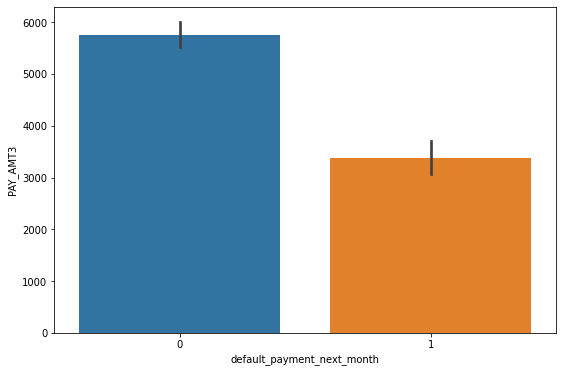

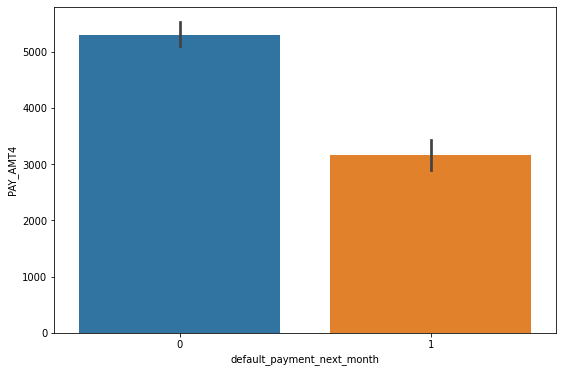

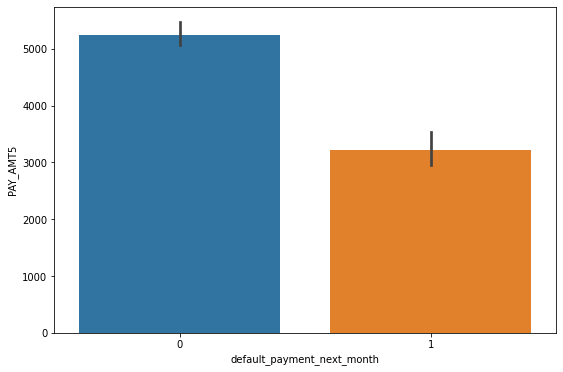

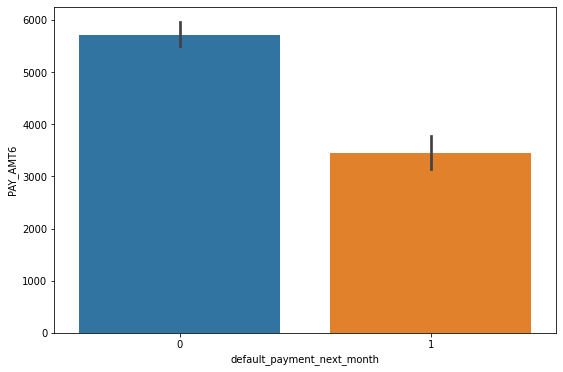

In [ ]:


for col in continous_features:
    fig = plt.figure(figsize=(9, 6))
    continous = data[col]
    label = data['default_payment_next_month']
    sns.barplot(x=label, y=continous)
    plt.xlabel('default_payment_next_month')
    plt.ylabel(col)
plt.show()


## **Categorical Features EDA**

### **Univariate Analysis of Categorical Features**

In [ ]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',]

<Figure size 720x360 with 0 Axes>

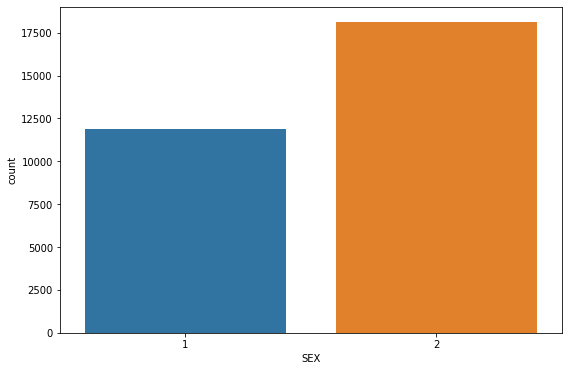

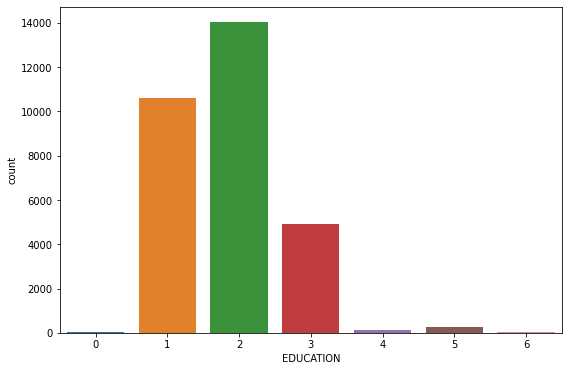

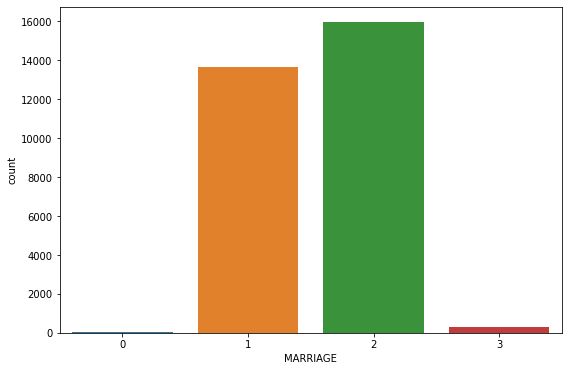

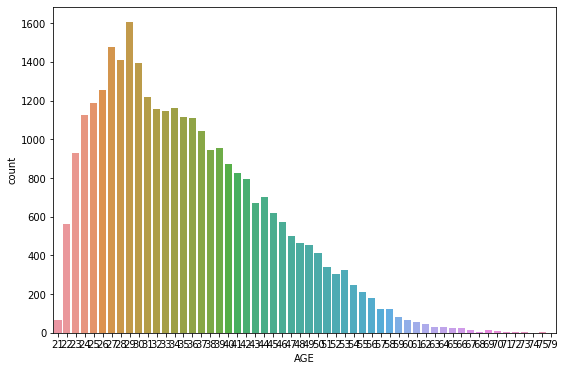

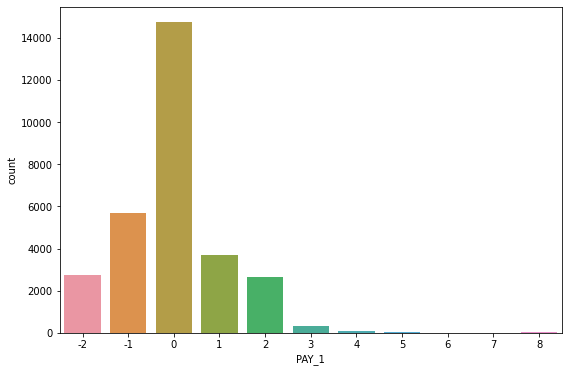

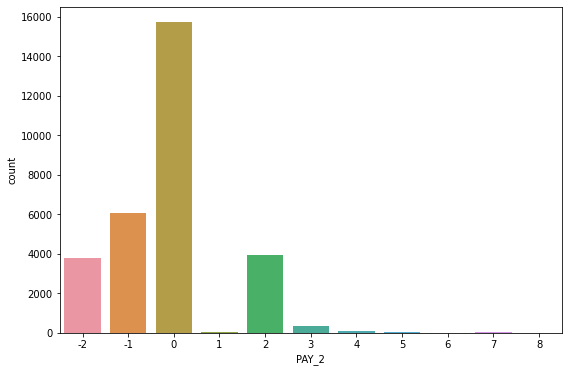

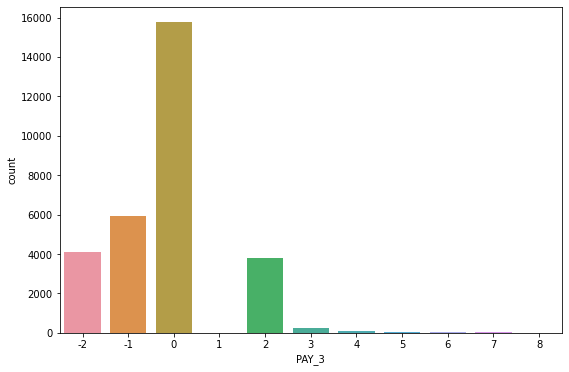

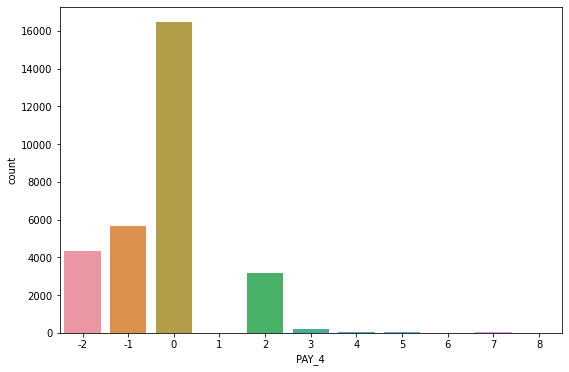

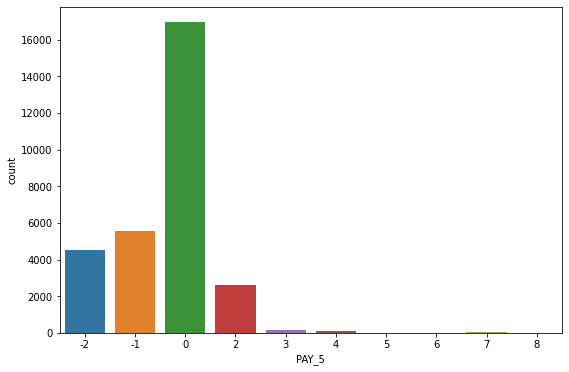

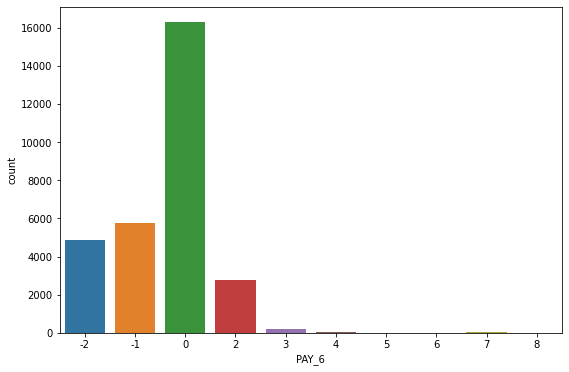

In [ ]:
plt.figure(figsize=(10,5))
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    categorical = data[col]
    sns.countplot(data[col])
plt.show()

### **2. Bivariate Analysis of Categorical Features**

<Figure size 720x360 with 0 Axes>

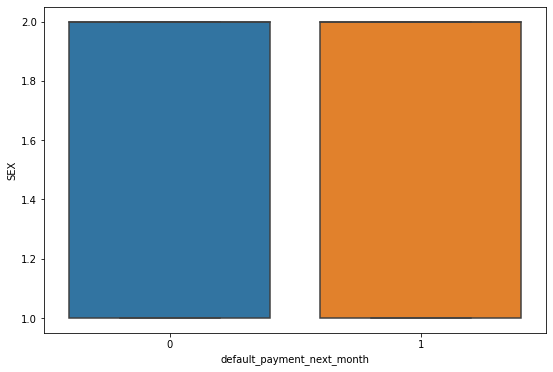

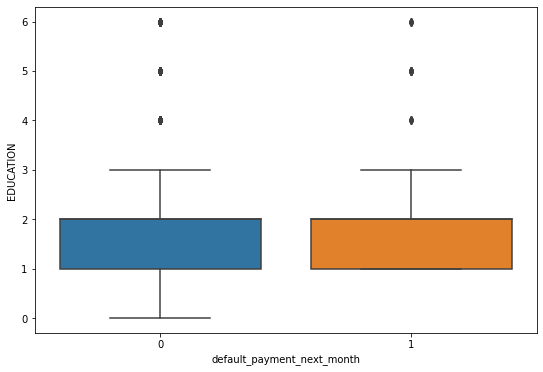

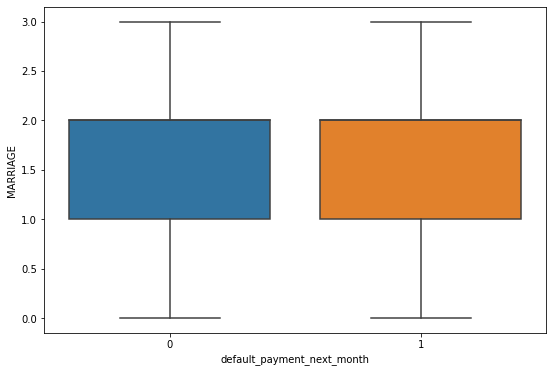

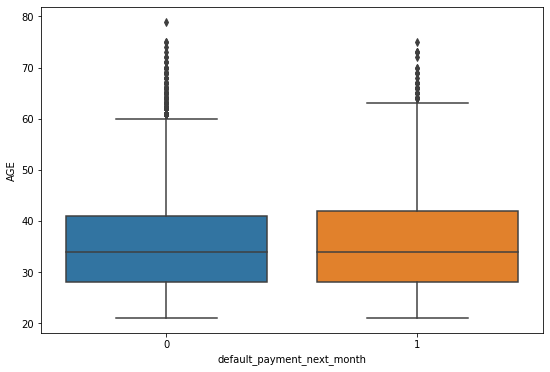

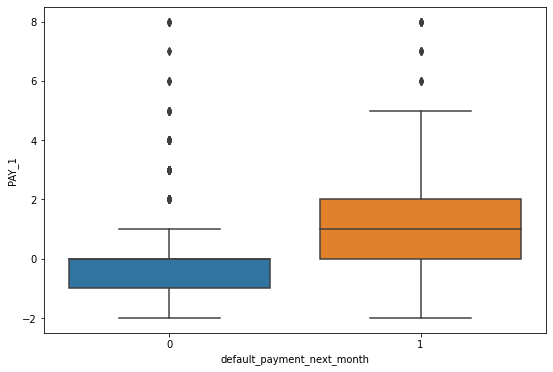

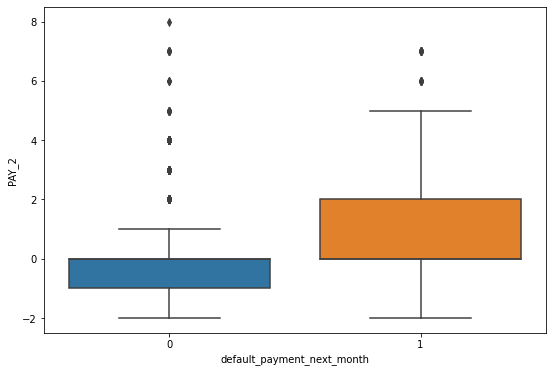

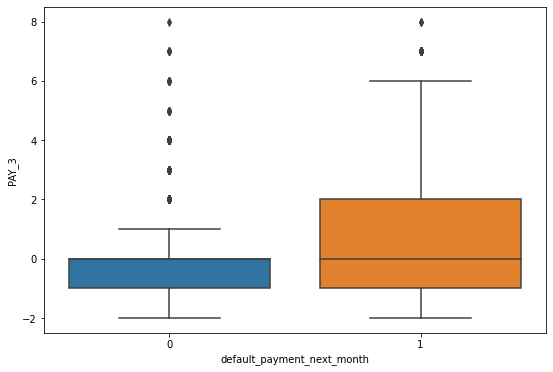

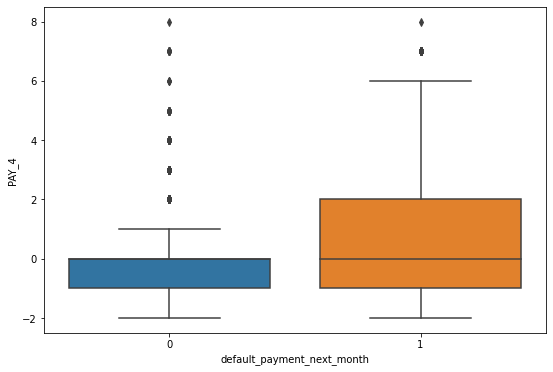

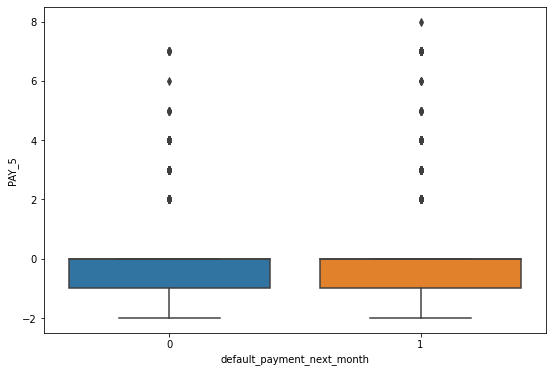

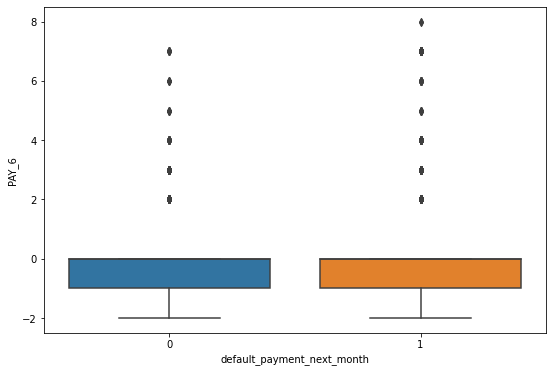

In [ ]:
plt.figure(figsize=(10,5))
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    sns.boxplot(x='default_payment_next_month', y =col, data = data)
plt.show()

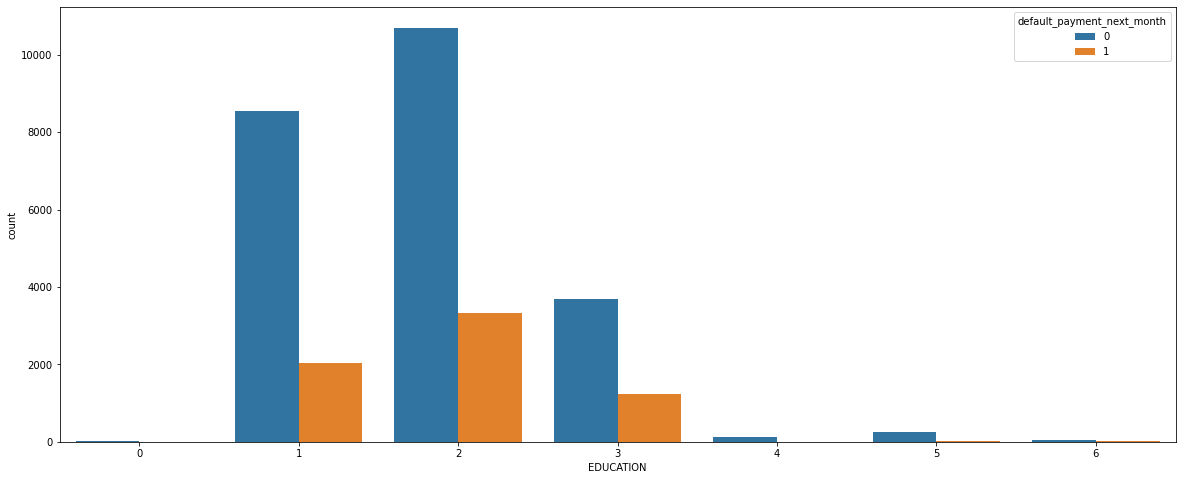

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'EDUCATION',hue = 'default_payment_next_month', data = data)

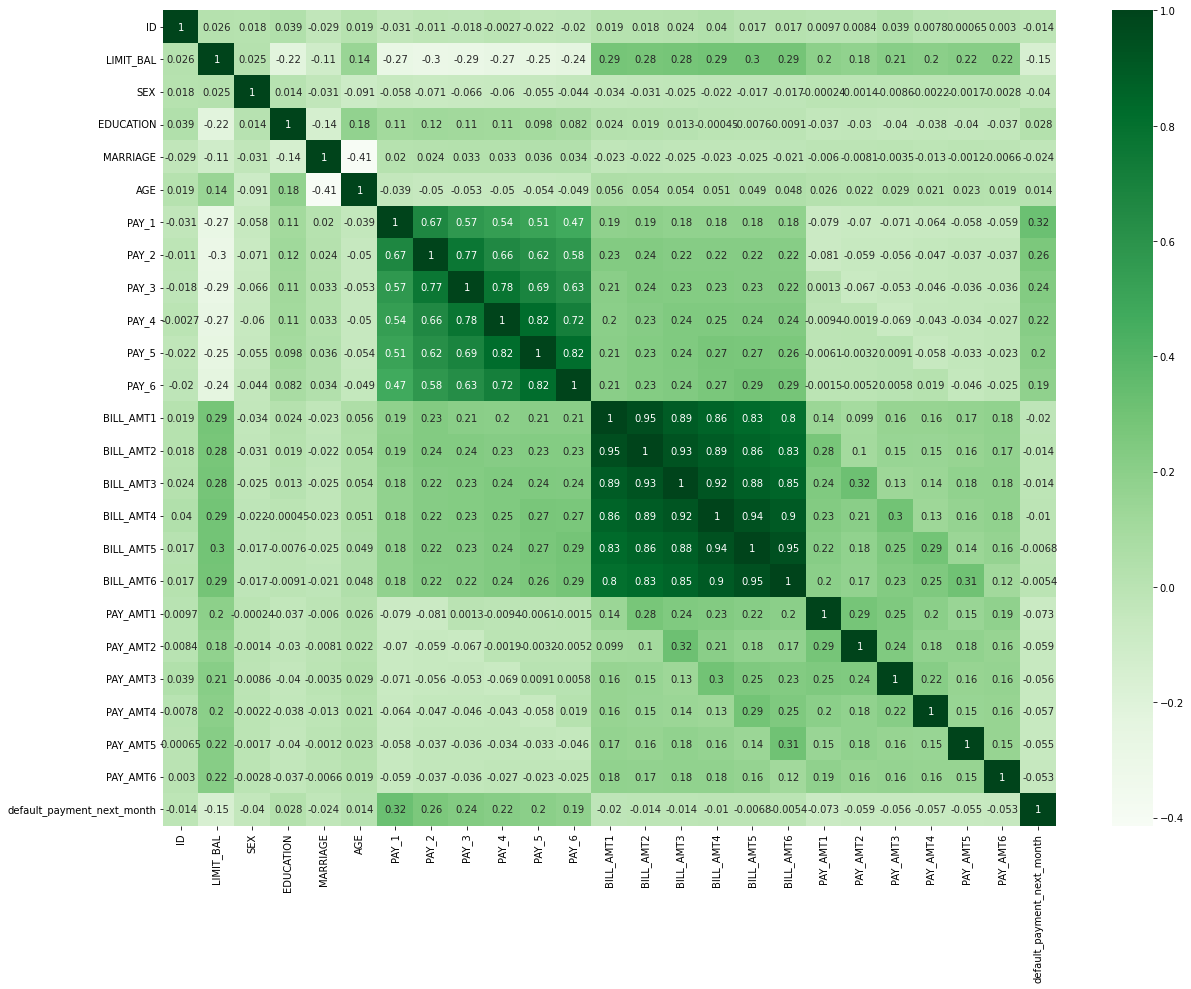

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,cmap="Greens")


Here many features are correlated with each other, but we cant delete those features. Because it contains the past transaction details of the customers.

# **4. Feature Engineering**

### **1. EDUCATION**

In [ ]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
data["EDUCATION"] = data["EDUCATION"].replace({5:4,6:4,0:4})
data["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

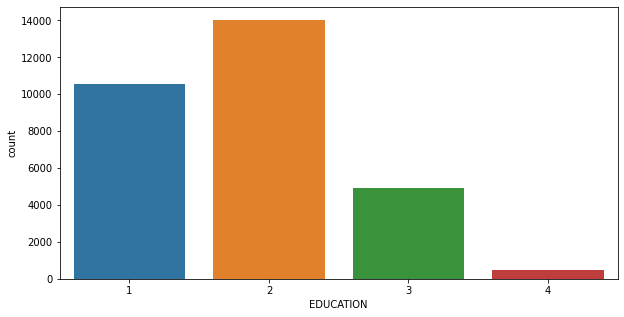

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'EDUCATION', data = data)

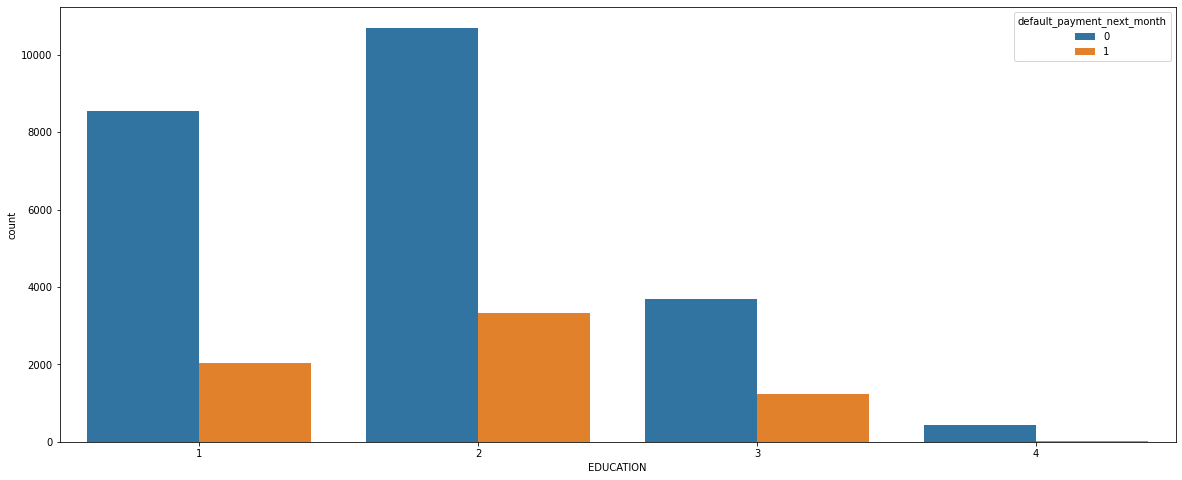

In [ ]:
#target variable VS Education Feature
plt.figure(figsize=(20,8))
sns.countplot(x = 'EDUCATION',hue = 'default_payment_next_month', data = data)

### **2. MARRIAGE**

In [ ]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
data["MARRIAGE"] = data["MARRIAGE"].replace({0:3})
data["MARRIAGE"].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

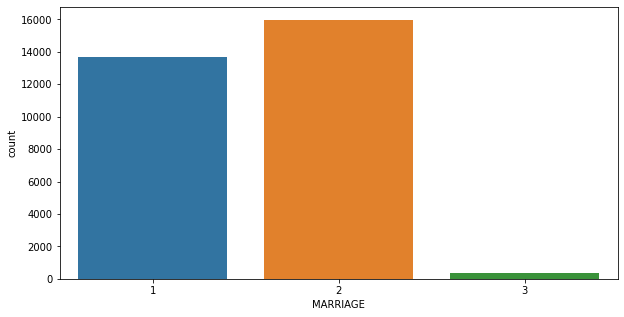

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'MARRIAGE', data = data)

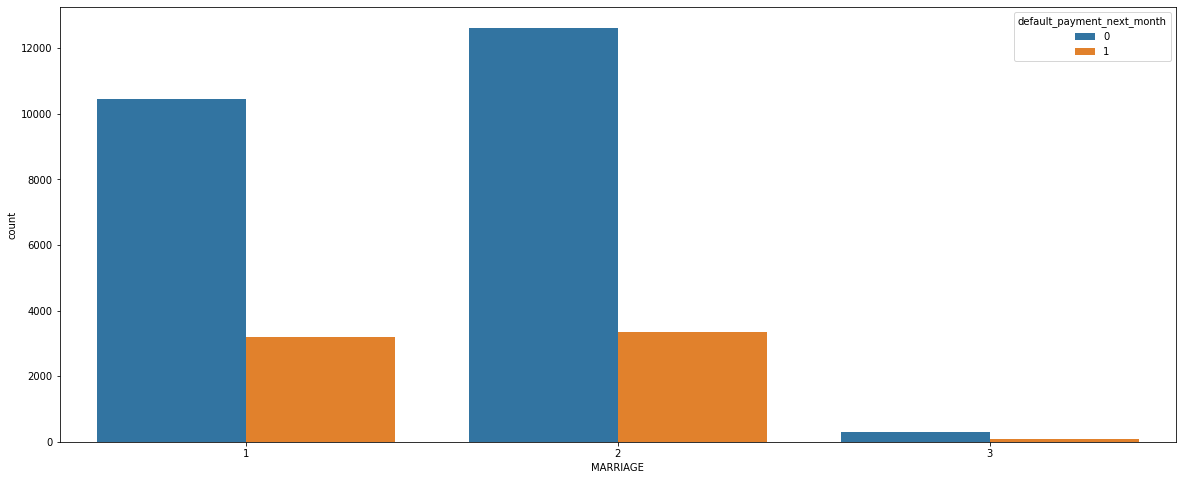

In [ ]:
#target variable VS Marriage Feature
plt.figure(figsize=(20,8))
sns.countplot(x = 'MARRIAGE',hue = 'default_payment_next_month', data = data)

### **3. AGE**

In [ ]:
# counts the age data set
data['AGE'].unique()


array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

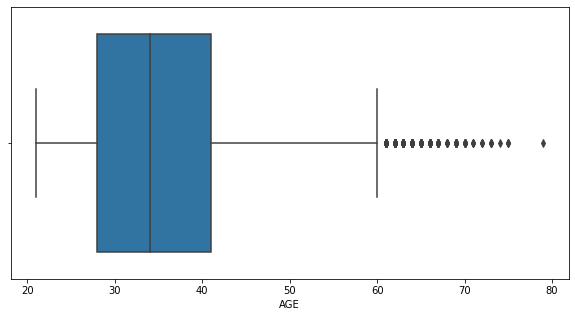

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'AGE', data = data)

In [ ]:
def set_age(x):
  if x>60:
    return 60
  else:
    return x

In [ ]:
data["AGE"] = data["AGE"].apply(lambda x :set_age(x))

In [ ]:
data["AGE"].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
60     339
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
21      67
Name: AGE, dtype: int64

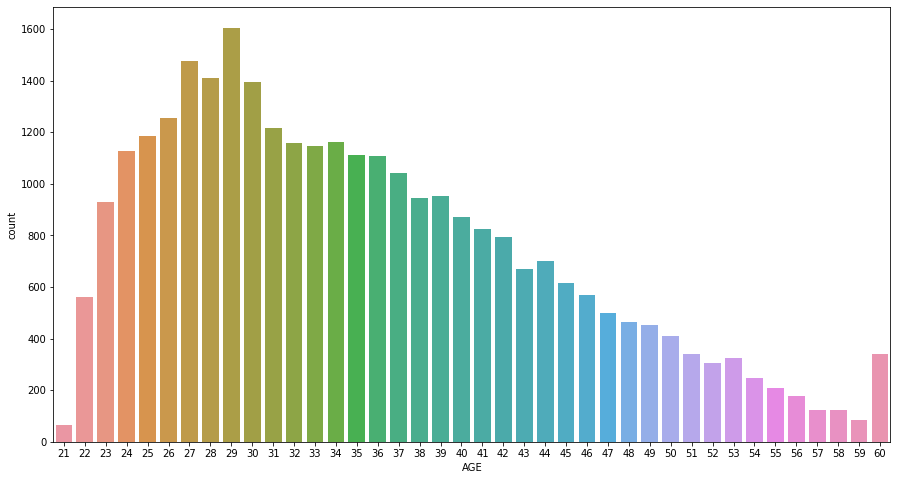

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'AGE', data = data)

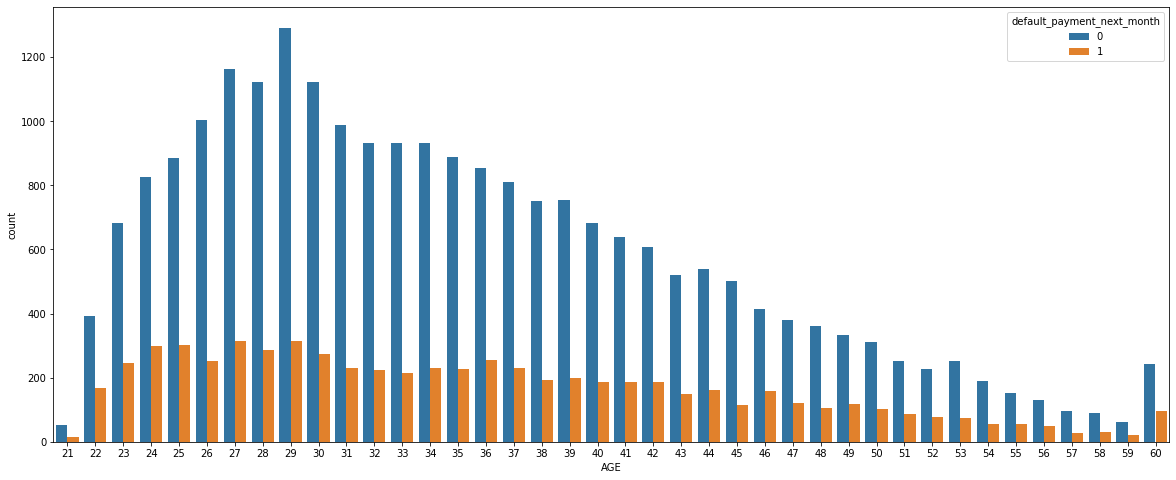

In [ ]:
#target variable VS Age Feature
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE',hue = 'default_payment_next_month', data = data)

### **4. GENDER(SEX)**

In [ ]:
data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

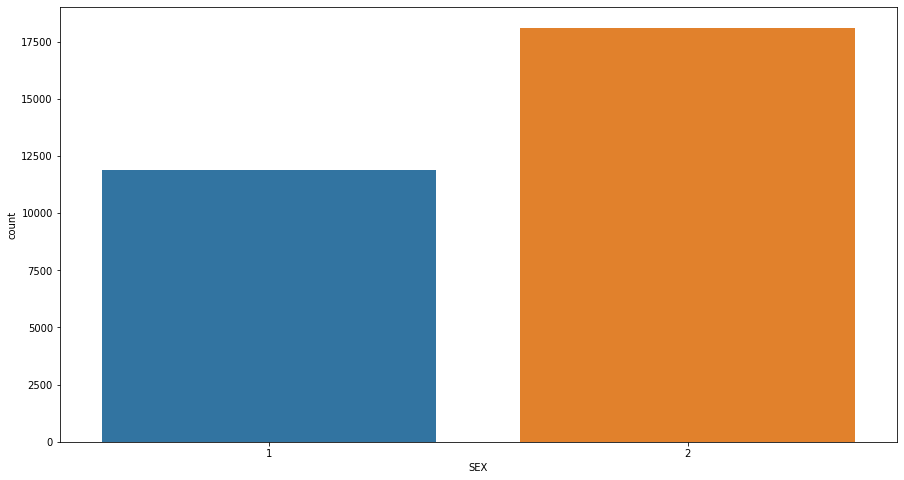

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'SEX', data = data)

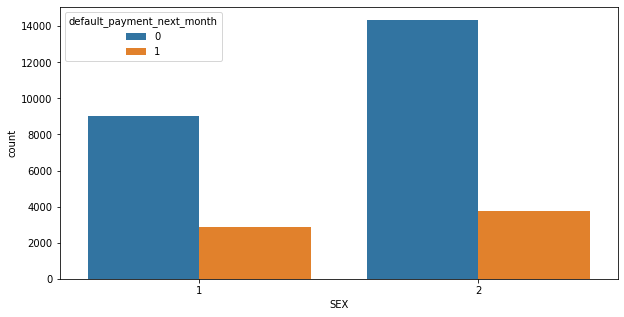

In [ ]:
#target variable VS Sex feature
plt.figure(figsize=(10,5))
sns.countplot(x = 'SEX', hue = 'default_payment_next_month', data = data)

## **SMOTE to manage Target Variable**

Text(0, 0.5, 'Frequency')

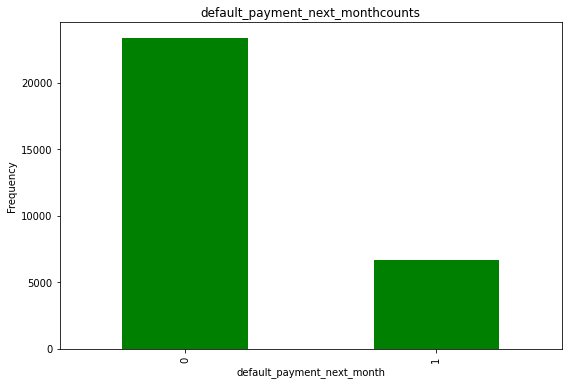

In [ ]:

counts = data['default_payment_next_month'].value_counts().sort_index()
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
counts.plot.bar(ax = ax, color='g')
ax.set_title('default_payment_next_month' + 'counts')
ax.set_xlabel('default_payment_next_month') 
ax.set_ylabel("Frequency")

**In our data set we have Imbalanced Data Distribution in our dependent variable, it generally happens when observations in one of the class are much higher i.e not defaulter or lower than the other classes i.e defaulter.**

**As Machine Learning algorithms tend to increase accuracy by reducing the error, they do not consider the class distribution.**

**Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class.** 

**In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when the minority class has a negligible or very lesser recall.**

In [ ]:
#using SMOTE for managing target variable and improving imbalance

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, Y_smote = smote.fit_resample(data.iloc[:,0:-1], data['default_payment_next_month']) 

print('Original dataset shape', len(data))
print('Resampled dataset shape', len(Y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [ ]:
print(X_smote)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
46723  18773      50000    2          2         1   44      0      0      0   
46724   4212      30000    1          2         2   41      2      2      0   
46725  16433      30000    2          2         1   53      2      2      2   
46726  12115     280000    2          1         1   45      1      0      0   
46727  28526     220000    1          1         1   46     -2     -2     -2   

       PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5 

In [ ]:
df = X_smote
df['default_payment_next_month'] = Y_smote
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.shape

(46728, 25)

Text(0, 0.5, 'Frequency')

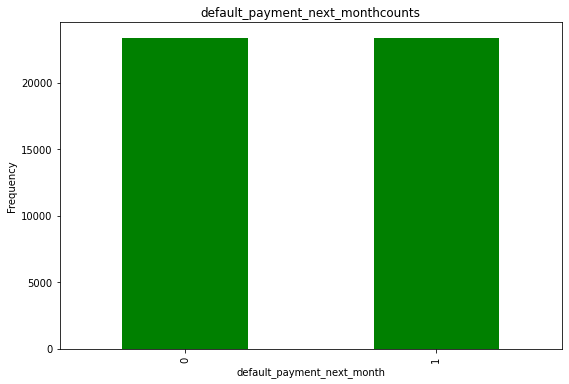

In [ ]:
#check target variable value proportion
counts = df['default_payment_next_month'].value_counts().sort_index()
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
counts.plot.bar(ax = ax, color='g')
ax.set_title('default_payment_next_month' + 'counts')
ax.set_xlabel('default_payment_next_month') 
ax.set_ylabel("Frequency")

### **Converting categorical features into numerical features**

In [ ]:
#get dummies 
df = pd.get_dummies(df, columns=['EDUCATION','MARRIAGE'])
#get dummies
df = pd.get_dummies(df, columns = ['PAY_1',	'PAY_2',	'PAY_3',	'PAY_4',	'PAY_5',	'PAY_6'])

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3',
       'PAY_1_-2', 'PAY_1_-1', 'PAY_1_0', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3',
       'PAY_1_4', 'PAY_1_5', 'PAY_1_6', 'PAY_1_7', 'PAY_1_8', 'PAY_2_-2',
       'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4',
       'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-2', 'PAY_3_-1',
       'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5',
       'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0',
       'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6',
       'PAY_4_7', 'PAY_4_8', 'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_1',
       'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_

# **5. Model Implementation**

## **Performance Metrics**

**Precision is a good metric to use when the costs of false positive(FP) is high**.

**Precision = TP / (TP + FP)**

**Recall is a good metric to use when the cost associated with false negative(FN) is high.**

**Recall = TP / (TP + FN)**

**F1-score is a weighted average of precision and recall. Thus, it considers FP and FN. This metric is very useful when we have uneven class distribution, as it seeks a balance between precision and recall.**

**F1-score = 2 * (precision * recall) / (precision + recall)**

## **Pre-processing**

In [ ]:
#importing packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

In [ ]:
#independent feature

X_ = pd.DataFrame(df.drop('default_payment_next_month', axis=1))

In [ ]:
#dependent feature
Y = df['default_payment_next_month'] 

In [ ]:
#standardise the x value by using satandardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X_)

In [ ]:
#split the data set
X_train, X_test, y_train, y_test = train_test_split(X_, Y, test_size=0.3, random_state=42)

In [ ]:
#create a function to calculate evaluation matrices
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

train_matrix = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'f1_score_', 'roc'])
test_matrix = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'f1_score_', 'roc'])

def get_score(y_true, y_pred):
  accuracy = accuracy_score(y_true,y_pred)
  precision = precision_score(y_true,y_pred)
  recall = recall_score(y_true,y_pred)
  f1_score_ = f1_score(y_true,y_pred)
  roc = roc_auc_score(y_true,y_pred)

  lst = [accuracy, precision, recall, f1_score_, roc]

  return lst

def get_cm(y_true, y_pred):
  # Get the confusion matrix for both train and test
  cm = confusion_matrix(y_true, y_pred)
  print(cm)

  labels = ['Not Defaulter', 'Defaulter']
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
  
  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
logistic = LogisticRegression()

Using Grid seach cv

In [ ]:
#set the parmeter
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 300, 500, 1000] }

In [ ]:
#fit the parameter 
grid_lr = GridSearchCV(LogisticRegression(), param_grid, n_jobs = -1, verbose = 3, cv = 5)
#training model
grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 300, 500,
                               1000],
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [ ]:
grid_lr.best_score_

0.6169858575200307

In [ ]:
grid_lr.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [ ]:
#prediction
y_pred_lr_train = grid_lr.predict(X_train)
y_pred_lr_test = grid_lr.predict(X_test)

In [ ]:
#evaluation matrix on train data
score = get_score(y_train, y_pred_lr_train)
train_matrix['Logistic Reggression'] =score
train_matrix

,Logistic Reggression
accuracy,0.616191
precision,0.610593
recall,0.640917
f1_score_,0.625388
roc,0.616198


In [ ]:
#evaluation matrix on test data
score = get_score(y_test, y_pred_lr_test)
test_matrix['Logistic Reggression'] =score
test_matrix

,Logistic Reggression
accuracy,0.610600
precision,0.605281
recall,0.637297
f1_score_,0.620876
roc,0.610583


[[ 9676  6683]
 [ 5871 10479]]


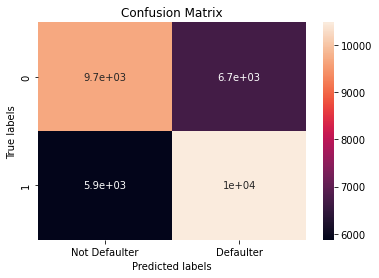

In [ ]:
#confusion matrix
get_cm(y_train, y_pred_lr_train)

## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# creating param dict to check diffirent value of parameter
max_depth=[13,14,15,16,17,18,19,20]
min_samples_leaf=[10,11,12,13,14,15]
splitter = ['random']
params = {'splitter':splitter, 'max_depth' :max_depth, 'min_samples_leaf': min_samples_leaf}

In [ ]:
#fit the parameter
dt_clf = GridSearchCV(DecisionTreeClassifier(), param_grid=params,verbose=0)
#training model
dt_clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [13, 14, 15, 16, 17, 18, 19, 20],
                         'min_samples_leaf': [10, 11, 12, 13, 14, 15],
                         'splitter': ['random']})

In [ ]:
dt_clf.best_params_

{'max_depth': 18, 'min_samples_leaf': 13, 'splitter': 'random'}

In [ ]:
#prediction
y_pred_dt_train = dt_clf.predict(X_train)
y_pred_dt_test = dt_clf.predict(X_test)

In [ ]:
#evaluation matrix on train data
score = get_score(y_train, y_pred_dt_train)
train_matrix['Decision Tree'] =score
train_matrix

,Logistic Reggression,Decision Tree
accuracy,0.619035,0.785808
precision,0.607306,0.817133
recall,0.673089,0.736269
f1_score_,0.638508,0.774596
roc,0.619049,0.785795


In [ ]:
#evaluation matrix on test data
score = get_score(y_test, y_pred_dt_test)
test_matrix['Decision Tree'] =score
test_matrix

,Logistic Reggression,Decision Tree
accuracy,0.613239,0.745274
precision,0.601350,0.775132
recall,0.673368,0.691474
f1_score_,0.635324,0.730917
roc,0.613201,0.745309


[[13665  2694]
 [ 4312 12038]]


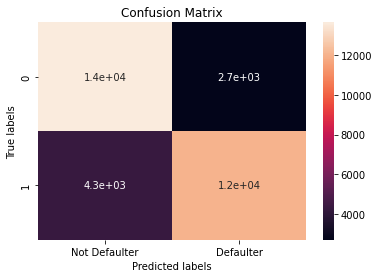

In [ ]:
#confusion matrix
get_cm(y_train, y_pred_dt_train)

## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
param_grid = {'n_neighbors' : [2,3,4,5]}

In [ ]:
#fit the parameter
knn = GridSearchCV(KNeighborsClassifier() , param_grid, n_jobs = -1, verbose = 3, cv = 3)
#training model
knn.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 3, 4, 5]}, verbose=3)

In [ ]:
knn.best_params_

{'n_neighbors': 2}

In [ ]:
#prediction
y_pred_knn_train = knn.predict(X_train)
y_pred_knn_test = knn.predict(X_test)

In [ ]:
#evaluation matrix on train data
score = get_score(y_train, y_pred_knn_train)
train_matrix['KNN'] =score
train_matrix

,Logistic Reggression,Decision Tree,KNN
accuracy,0.619035,0.785808,0.963435
precision,0.607306,0.817133,1.000000
recall,0.673089,0.736269,0.926850
f1_score_,0.638508,0.774596,0.962037
roc,0.619049,0.785795,0.963425


In [ ]:
#evaluation matrix on test data
score = get_score(y_test, y_pred_knn_test)
test_matrix['KNN'] =score
test_matrix

,Logistic Reggression,Decision Tree,KNN
accuracy,0.613239,0.745274,0.786861
precision,0.601350,0.775132,0.783601
recall,0.673368,0.691474,0.792985
f1_score_,0.635324,0.730917,0.788265
roc,0.613201,0.745309,0.786857


[[16359     0]
 [ 1196 15154]]


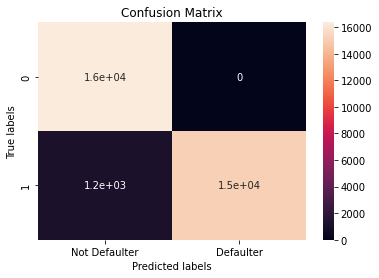

In [ ]:
#confusion matrix
get_cm(y_train, y_pred_knn_train)

## **Random Forest**

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth = 25, min_samples_leaf=12)

In [ ]:
#training model
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_leaf=12)

In [ ]:
#prediction
y_pred_rf_train = rf_clf.predict(X_train)
y_pred_rf_test = rf_clf.predict(X_test)

In [ ]:
#evaluation matrix on train data
score = get_score(y_train, y_pred_rf_train)
train_matrix['Random forest'] =score
train_matrix

,Logistic Reggression,Decision Tree,KNN,Random forest
accuracy,0.619035,0.785808,0.963435,0.847626
precision,0.607306,0.817133,1.000000,0.878161
recall,0.673089,0.736269,0.926850,0.807156
f1_score_,0.638508,0.774596,0.962037,0.841163
roc,0.619049,0.785795,0.963425,0.847615


In [ ]:
#evaluation matrix on test data
score = get_score(y_test, y_pred_rf_test)
test_matrix['Random forest'] =score
test_matrix

,Logistic Reggression,Decision Tree,KNN,Random forest
accuracy,0.613239,0.745274,0.786861,0.800556
precision,0.601350,0.775132,0.783601,0.828198
recall,0.673368,0.691474,0.792985,0.758768
f1_score_,0.635324,0.730917,0.788265,0.791964
roc,0.613201,0.745309,0.786857,0.800583


[[14528  1831]
 [ 3153 13197]]


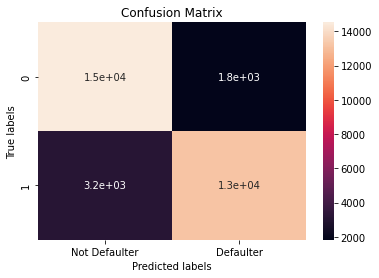

In [ ]:
#confusion matrix
get_cm(y_train, y_pred_rf_train)

## **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#setting parameters for gboost
parameters={'max_depth':[12],'min_samples_leaf':[12],'learning_rate':[.05]}

In [ ]:
#set the parmeter
#fit the parameter
gb_clf = GridSearchCV(GradientBoostingClassifier(), param_grid = parameters, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
gb_clf.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05], 'max_depth': [12],
                         'min_samples_leaf': [12]},
             scoring='accuracy', verbose=3)

In [ ]:
gb_clf.best_params_

{'learning_rate': 0.05, 'max_depth': 12, 'min_samples_leaf': 12}

In [ ]:
# Get the predicted classes
y_pred_gb_train = gb_clf.predict(X_train)
y_pred_gb_test = gb_clf.predict(X_test)

In [ ]:
#evaluation matrix on train data
score = get_score(y_train, y_pred_gb_train)
train_matrix['GB'] =score
train_matrix

,Logistic Reggression,Decision Tree,KNN,Random forest,GB
accuracy,0.619035,0.785808,0.963435,0.847626,0.929866
precision,0.607306,0.817133,1.000000,0.878161,0.952660
recall,0.673089,0.736269,0.926850,0.807156,0.904648
f1_score_,0.638508,0.774596,0.962037,0.841163,0.928034
roc,0.619049,0.785795,0.963425,0.847615,0.929859


In [ ]:
#evaluation matrix on test data
score = get_score(y_test, y_pred_gb_test)
test_matrix['GB'] =score
test_matrix

,Logistic Reggression,Decision Tree,KNN,Random forest,GB
accuracy,0.613239,0.745274,0.786861,0.800556,0.827163
precision,0.601350,0.775132,0.783601,0.828198,0.854408
recall,0.673368,0.691474,0.792985,0.758768,0.788993
f1_score_,0.635324,0.730917,0.788265,0.791964,0.820399
roc,0.613201,0.745309,0.786857,0.800583,0.827188


[[15624   735]
 [ 1559 14791]]


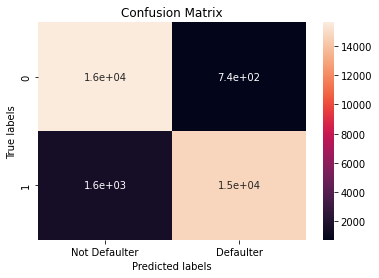

In [ ]:
#confusion matrix
get_cm(y_train, y_pred_gb_train)

# **6. Model Explanability**

## **All models performance graph**

In [ ]:
#all models evaluation matrices
final_matrices=test_matrix.transpose().reset_index().rename(columns={'index':'Models'})

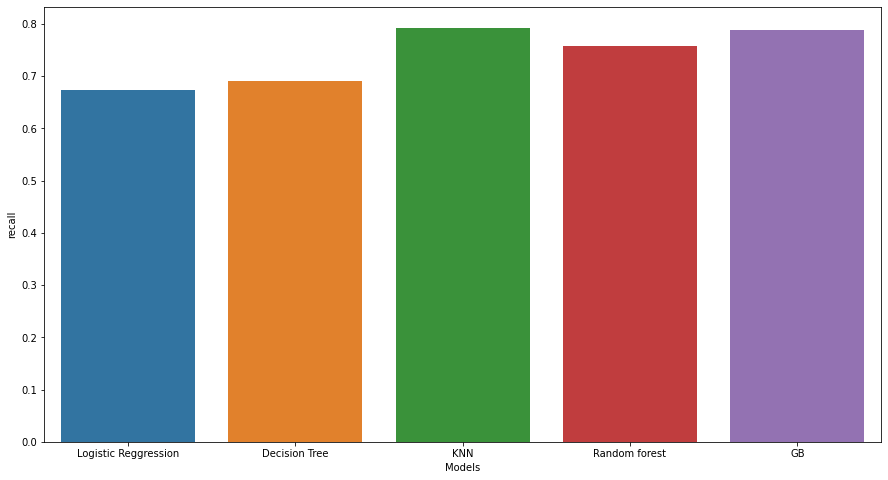

In [ ]:
#plot recall scores for all model
plt.figure(figsize=(15,8))
sns.barplot(x='Models',y='recall',data=final_matrices)

## **LIME**

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 4.9 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=c573749681838dc0853e577cf26e9dbe324b5c6ea3a83cba0bc370e7fd7f76d0
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [ ]:
# LIME SECTION
import lime
import lime.lime_tabular

In [ ]:
# LIME has one explainer for all the models
lime_svc = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  verbose=True, mode='classification')

In [ ]:
# Choose the 5th instance and use it to predict the results
p = 5
exp_svc = lime_svc.explain_instance(X_test.values[p], svc_clf.predict_proba, num_features=6)
exp_svc.show_in_notebook(show_all=False)

NotFittedError: ignored

## **Feature importance**

In [ ]:
features = X_train.columns
importances = rf_clf.feature_importances_
indices = np.argsort(importances[:10])

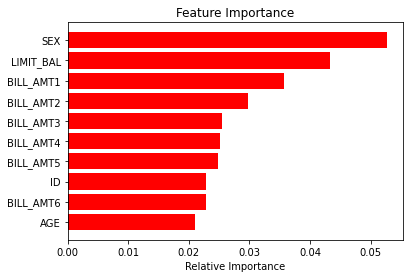

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## **ELI5**

In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 4.8 MB/s 
     |████████████████████████████████| 133 kB 59.4 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=3cb04adc9e9fcb4652c53237f226690bd32a634a2bc05d8dc9992a2e3e55984d
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompa

In [ ]:
import eli5
from eli5.lime import TextExplainer

te = TextExplainer(random_state=42)
te.fit(doc, pipe.predict_proba)
te.show_prediction(target_names=twenty_train.target_names)

NameError: ignored

In [ ]:
#import eli5
import eli5 as eli
feature_names=list(X_test.columns)

In [ ]:
for_instance=2

In [ ]:
 eli.show_prediction(gb_clf.best_estimator_, X_test.reset_index(drop=True).loc[[for_instance]],
                    feature_names=feature_names,
                    show_feature_values=True)

**From above charts we can say that limit balance and the last months transactions are the important features for prediction the defaulter**